# STEP 9

2D Laplace Equation


Laplace's equation in 2D:

$$\frac{\partial ^2 p}{\partial x^2} + \frac{\partial ^2 p}{\partial y^2} = 0$$

The discretized equation is:

$$\frac{p_{i+1, j}^n - 2p_{i,j}^n + p_{i-1,j}^n}{\Delta x^2} + \frac{p_{i,j+1}^n - 2p_{i,j}^n + p_{i, j-1}^n}{\Delta y^2} = 0$$

Solving for $p_{i,j}^n$:

$$p_{i,j}^n = \frac{\Delta y^2(p_{i+1,j}^n+p_{i-1,j}^n)+\Delta x^2(p_{i,j+1}^n + p_{i,j-1}^n)}{2(\Delta x^2 + \Delta y^2)}$$

Solve Laplace's equation numerically by assuming an initial state of $p=0$ everywhere, boundary conditions as follows:

$p=0$ at $x=0$

$p=y$ at $x=2$

$\frac{\partial p}{\partial y}=0$ at $y=0, \ 1$

In [12]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

nx=31
ny=31
dx=2/(nx-1)
dy=2/(ny-1)
p=numpy.zeros((ny,nx))
x=numpy.linspace(0,2,nx)
y=numpy.linspace(0,1,ny)
p[:,0]=0
p[:,-1]=y
p[0,:]=p[1,:]
p[-1,:]=p[-2,:]

def plot(x,y,p):
    fig = pyplot.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = numpy.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 1)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    
def laplace2d(p,y,dx,dy,l1norm_target):
    l1norm=1
    pn=numpy.empty_like(p)
    while l1norm > l1norm_target:
        pn = p.copy()
        p[1:-1, 1:-1] = ((dy**2 * (pn[1:-1, 2:] + pn[1:-1, 0:-2]) +
                         dx**2 * (pn[2:, 1:-1] + pn[0:-2, 1:-1])) /
                        (2 * (dx**2 + dy**2)))
            
        p[:, 0] = 0  # p = 0 @ x = 0
        p[:, -1] = y  # p = y @ x = 2
        p[0, :] = p[1, :]  # dp/dy = 0 @ y = 0
        p[-1, :] = p[-2, :]  # dp/dy = 0 @ y = 1
        l1norm = (numpy.sum(numpy.abs(p[:]) - numpy.abs(pn[:])) /
                numpy.sum(numpy.abs(pn[:])))
     
    return p 
    

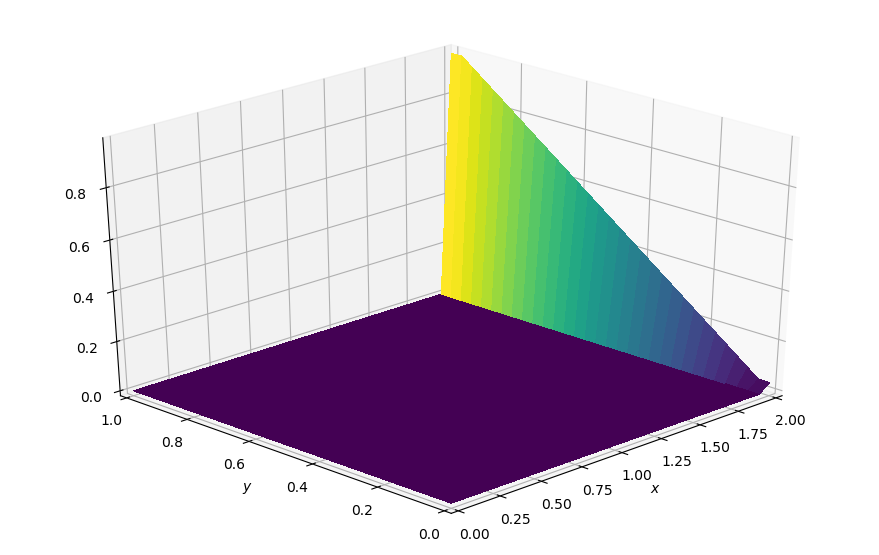

In [13]:

plot(x, y, p)

In [14]:
laplace2d(p,y,dx,dy,1e-4)

array([[0.        , 0.01189113, 0.02375945, 0.03558148, 0.04733245,
        0.05898561, 0.07051156, 0.08187753, 0.09304664, 0.10397711,
        0.1146214 , 0.12492532, 0.13482693, 0.14425546, 0.15312988,
        0.16135738, 0.16883139, 0.17542925, 0.18100916, 0.18540625,
        0.18842723, 0.18984307, 0.18937835, 0.18669542, 0.1813695 ,
        0.17284736, 0.16037378, 0.14284879, 0.11851972, 0.08423027,
        0.03333333],
       [0.        , 0.01189113, 0.02375945, 0.03558148, 0.04733245,
        0.05898561, 0.07051156, 0.08187753, 0.09304664, 0.10397711,
        0.1146214 , 0.12492532, 0.13482693, 0.14425546, 0.15312988,
        0.16135738, 0.16883139, 0.17542925, 0.18100916, 0.18540625,
        0.18842723, 0.18984307, 0.18937835, 0.18669542, 0.1813695 ,
        0.17284736, 0.16037378, 0.14284879, 0.11851972, 0.08423027,
        0.03333333],
       [0.        , 0.01192982, 0.02383729, 0.03569944, 0.04749199,
        0.05918871, 0.07076076, 0.08217596, 0.09339809, 0.1043861 ,
      

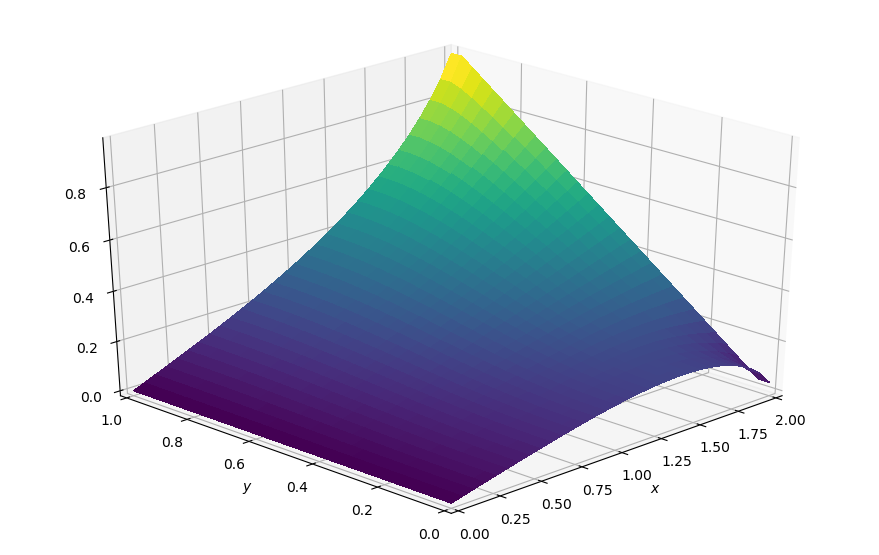

In [15]:
plot(x,y,p)